Andrew Koren

Continued from last week:

If data can be fit with a flat line, your data isn't really able to tell you much more. Don't add more parameters for no reason.

A small lattice will have trouble fitting/modeling a much larger system.

We were able to calcualte yesterday:

$$
\text{Prob}(\chi^2 > \chi_0^2) = \int_{\chi_0^2}^{\infty} P_m (\chi^2) d\chi^2
$$

This is also called the $p$ value. A bad fit has a small p-value 0.1%, etc., since it is easy to get a better fit. A $p=99.9\%$  means it is very unlikely that repeating the experiment would yield a better result. The cutoff value used in research is usually $p=5\%$ or $1\%$ (a suprisingly small value). At this point, there's no reason to stick on more parameters




Today's lecture

Lennard-Jones fluid

$$
V_{LJ} = 4\epsilon \left[\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6\right]
$$

$V_{LJ}$ has energy units. Consider reduced units to get out our annoying energy units

$$
r^* - \frac{r}{\sigma} \\
E^* = \frac{E}{\epsilon} \\
k_B = 1 \\
k_B T^* = \frac{k_B T}{\epsilon}
$$
Also we'll assume reduced units (drop the asterisk)

$$
V_{LJ}^{(r)} = 4 \left[ \left(\frac{1}{r}\right)^{12} - \left(\frac{1}{r}\right)^6\right] \\
r\rightarrow 0 , V_{LJ} \rightarrow +\infty \\
r \rightarrow \infty, V_{LJ} \rightarrow 0^- \\
r = 1, V_{LJ} = 0 \\
r_{\min} = \sqrt[6]{2}
$$

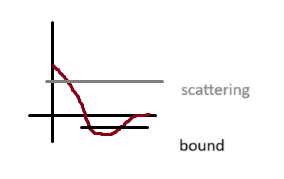

$$
m \frac{d\vec v_i}{dt} = \vec d_i \\
\vec f_i = -\vec \nabla_i \sum_{J=1}^N \sum_{k=j+1}^N V_{LJ} (\vec r_j, \vec r_k) \\
\mathcal O(N^2)
$$

The indexing $i$ is for each of $N$ particles. This is our first system in this class tracking all-to-all interaction, and is very costly. Alternatively, we can limit range to speed things up.

$$
V_{\vec r_i, \vec r_j} = \begin{cases} V_{LJ} (\vec r_i, \vec r_j), & |\vec r_i - \vec r_j| \leq r_{\text{cut}} \\ 0, & \text{otherwise} \end{cases}
$$

Still needs to evaluate if particles are in the cut or not, which isn't necessarily easy. $r_{\text{cut}} = 2.5÷3$

$$
\frac{d \vec v_i}{dt} (t) = \frac{\vec f_i (t)}{m} \\
\frac{d \vec r_i (t)}{dt} = \vec v_i (t)
$$

Can use leaprfrog:

$$
v_i \left( t + \frac{\Delta t}{2}\right) = v_i(t) + \frac{\Delta t}{2} \frac{f_i ({\vec r(t)})}{m} \\
\vec r_i ( t + \Delta t) = \vec r_i (t) + \Delta t \vec v_i \left(t + \frac{\Delta t}{2}\right) \\ 
\rightarrow \text{compute } \vec f_i ( {\vec r(t+\Delta t)}) \\
\vec v_i (t+ \Delta t) = \vec v_i \left( t+ \frac{\Delta t}{2} \right) + \frac{\Delta t}{2} \frac{f_i ({\vec r(t+\Delta t)})}{m}
$$

It looks like the 1st and 4th step are kinda repetitive, but we're going to modify the code later. This is a symplectic-integrator, actually the velocity-verlet not leapfrog.

Simulation details:

- initialize $\vec r_i, \vec v_i, i=1, N$ 
- Copute pairwise forces
- propogate $\vec r_i, \vec v_i$
- hanlde boundary condtions
- more to come when we modify the code

This simulation is energy-conserving. Use uniform or maxwell's distribution (basically gaussian) for initial conditions. 

Energy-conserving symplectic integrators won't have constant energy, but they'll fluxuate around the initial energy. This is a microcanonical ensemble or in chemical/statistcal physics it is fixed NVE, and we're looking to extract physical quantities.

Canonical ensemble fixed NVT. We might be interested in implementing a thermostat of our simulation as well (various techniques exist)

Boundaries:

- Periodic BC <br>
Needs us to write our particles to see their image, not trivial

- Hard wall <br>
Elastic bouncing, needs a method to flip vectors


Periodic $x \leftarrow ( x+ L_x) \% L_x $ <br>
HW:


```python

if x < R:
    x ← 2R - x
    if v_x < 0:
        v_x ← -v_x